In [1]:
### importing required resources
import pandas as pd
import numpy as np
from sympy import S, symbols, printing
from matplotlib import pyplot as plt
import datetime
import seaborn as sns

In [2]:
### specifying file location
file = 'C:/Users/jaska/Desktop/londes_temp.xlsx'

In [4]:
### reading the file into dataframe
londestemp = pd.read_excel(file)

In [5]:
### getting info about dataframe size and type
londestemp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245216 entries, 0 to 245215
Data columns (total 7 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   date      245216 non-null  datetime64[ns]
 1   time      245216 non-null  object        
 2   AMPM      245216 non-null  object        
 3   T10       205834 non-null  float64       
 4   T30       203453 non-null  float64       
 5   T50       203452 non-null  float64       
 6   air_temp  207115 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 13.1+ MB


In [6]:
### dropping all rows with missing values and rewriting the dataframe
londestemp.dropna(axis = 0, how = 'any', inplace=True) #axis=0 means rows are dropped, 1 means columns;
# how=any means rows where any column value is na is dropped, all would mean drop only rows where all columns are na;
# inplace=True means that the dataframe is rewritten
londestemp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199337 entries, 2869 to 245004
Data columns (total 7 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   date      199337 non-null  datetime64[ns]
 1   time      199337 non-null  object        
 2   AMPM      199337 non-null  object        
 3   T10       199337 non-null  float64       
 4   T30       199337 non-null  float64       
 5   T50       199337 non-null  float64       
 6   air_temp  199337 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 12.2+ MB


Text(0, 0.5, '50 cm temp')

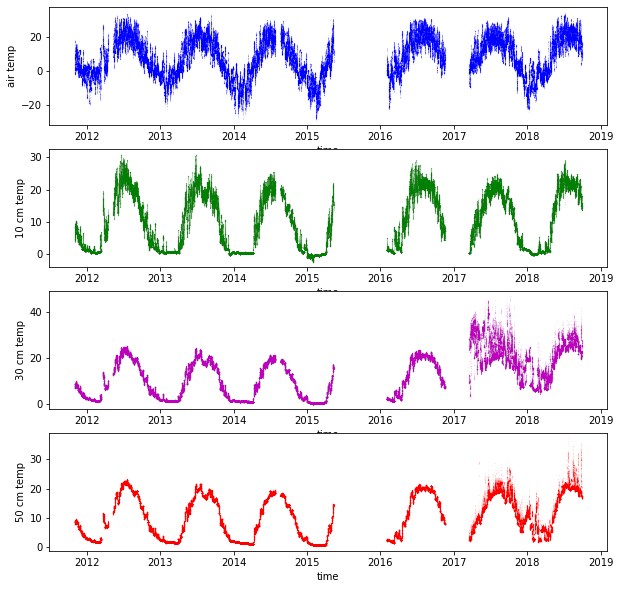

In [7]:
### plotting time series of whole dataset in subplots (for all columns)
plt.figure(figsize=(10,10))

plt.subplot(4,1,1)
plt.scatter(londestemp.date, londestemp.air_temp, s=0.001, marker='o', c='b')
plt.xlabel('time')
plt.ylabel('air temp')

plt.subplot(4,1,2)
plt.scatter(londestemp.date, londestemp.T10, s=0.001, marker='o', c='g')
plt.xlabel('time')
plt.ylabel('10 cm temp')

plt.subplot(4,1,3)
plt.scatter(londestemp.date, londestemp.T30, s=0.001, marker='o', c='m')
plt.xlabel('time')
plt.ylabel('30 cm temp')

plt.subplot(4,1,4)
plt.scatter(londestemp.date, londestemp.T50, s=0.001, marker='o', c='r')
plt.xlabel('time')
plt.ylabel('50 cm temp')

In [7]:
### correcting the dataset (excluding bad soil temperature values - 2017 and onwards)
londesnew = londestemp.loc[londestemp['date'].dt.year < 2017]

In [8]:
londesnew.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145465 entries, 2869 to 179614
Data columns (total 7 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   date      145465 non-null  datetime64[ns]
 1   time      145465 non-null  object        
 2   AMPM      145465 non-null  object        
 3   T10       145465 non-null  float64       
 4   T30       145465 non-null  float64       
 5   T50       145465 non-null  float64       
 6   air_temp  145465 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 8.9+ MB


Text(0, 0.5, '50 cm temp')

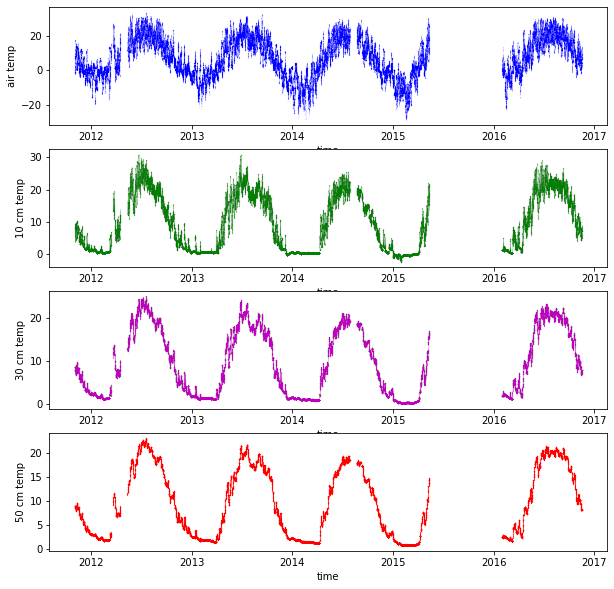

In [10]:
### plotting time series of whole new dataset in subplots (for all columns)
plt.figure(figsize=(10,10))
plt.subplot(4,1,1)
plt.scatter(londesnew.date, londesnew.air_temp, s=0.001, marker='o', c='b')
plt.xlabel('time')
plt.ylabel('air temp')
plt.subplot(4,1,2)
plt.scatter(londesnew.date, londesnew.T10, s=0.001, marker='o', c='g')
plt.xlabel('time')
plt.ylabel('10 cm temp')
plt.subplot(4,1,3)
plt.scatter(londesnew.date, londesnew.T30, s=0.001, marker='o', c='m')
plt.xlabel('time')
plt.ylabel('30 cm temp')
plt.subplot(4,1,4)
plt.scatter(londesnew.date, londesnew.T50, s=0.001, marker='o', c='r')
plt.xlabel('time')
plt.ylabel('50 cm temp')

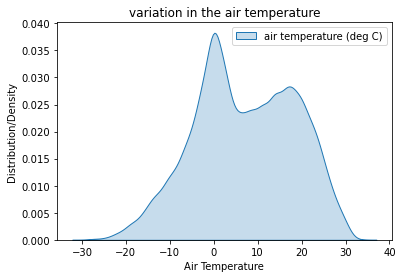

In [11]:
### plotting histogram for air temperature in whole dataset using seaborn
plt.figure()
sns.kdeplot(londesnew.air_temp, shade=True, label='air temperature (deg C)')
plt.title('variation in the air temperature')
plt.xlabel('Air Temperature')
plt.ylabel('Distribution/Density')
plt.legend()

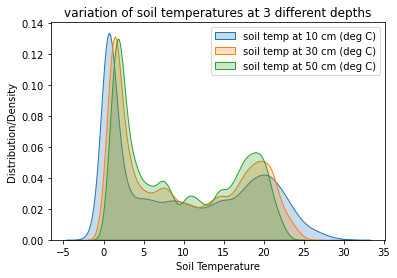

In [12]:
### plotting histogram for soil temperature in whole dataset using seaborn
plt.figure()
sns.kdeplot(londesnew.T10, shade=True, label='soil temp at 10 cm (deg C)')
sns.kdeplot(londesnew.T30, shade=True, label='soil temp at 30 cm (deg C)')
sns.kdeplot(londesnew.T50, shade=True, label='soil temp at 50 cm (deg C)')
plt.title('variation of soil temperatures at 3 different depths')
plt.xlabel('Soil Temperature')
plt.ylabel('Distribution/Density')
plt.legend()

In [13]:
### dividing dataset into different months
jan = londesnew.loc[londesnew['date'].dt.month == 1]
feb = londesnew.loc[londesnew['date'].dt.month == 2]
mar = londesnew.loc[londesnew['date'].dt.month == 3]
apr = londesnew.loc[londesnew['date'].dt.month == 4]
may = londesnew.loc[londesnew['date'].dt.month == 5]
jun = londesnew.loc[londesnew['date'].dt.month == 6]
jul = londesnew.loc[londesnew['date'].dt.month == 7]
aug = londesnew.loc[londesnew['date'].dt.month == 8]
sep = londesnew.loc[londesnew['date'].dt.month == 9]
otb = londesnew.loc[londesnew['date'].dt.month == 10]
nov = londesnew.loc[londesnew['date'].dt.month == 11]
dec = londesnew.loc[londesnew['date'].dt.month == 12]

In [14]:
### creating winter and summer datasets
winter = pd.concat([dec, jan, feb, mar, apr, may], ignore_index = True)
summer = pd.concat([jun, jul, aug, sep, otb, nov], ignore_index = True)

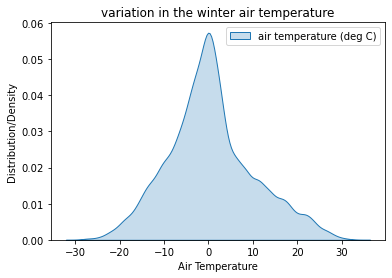

In [15]:
### LOOKING AT WINTER CONDITIONS

### plotting histogram for air temperature in winter dataset using seaborn
plt.figure()
sns.kdeplot(winter.air_temp, shade=True, label='air temperature (deg C)')
plt.title('variation in the winter air temperature')
plt.xlabel('Air Temperature')
plt.ylabel('Distribution/Density')
plt.legend()

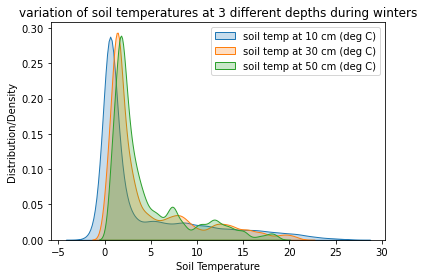

In [16]:
### plotting histogram for soil temperature in winter using seaborn
plt.figure()
sns.kdeplot(winter.T10, shade=True, label='soil temp at 10 cm (deg C)')
sns.kdeplot(winter.T30, shade=True, label='soil temp at 30 cm (deg C)')
sns.kdeplot(winter.T50, shade=True, label='soil temp at 50 cm (deg C)')
plt.title('variation of soil temperatures at 3 different depths during winters')
plt.xlabel('Soil Temperature')
plt.ylabel('Distribution/Density')
plt.legend()

In [18]:
### finding out when 10 cm soil freezes in the whole dataset
soilfreeze = londesnew.loc[londesnew['T10']<0]
soilfreeze.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6673 entries, 76729 to 120498
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      6673 non-null   datetime64[ns]
 1   T10       6673 non-null   float64       
 2   T30       6673 non-null   float64       
 3   T50       6673 non-null   float64       
 4   air_temp  6673 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 312.8 KB


In [20]:
# finding out the number of instances when soil at 10 cm freezes
freezenumber = soilfreeze.date.count()
freezenumber

6673

In [21]:
# finding out the number of instances in whole dataset
totalnumber = londesnew.date.count()
totalnumber

145465

In [23]:
# %age or probability of soil being frozen at 10cm in a given year
percentage = 100*(freezenumber/totalnumber)
print('out of ' +str(totalnumber)+ ' instances, the soil at 10 cm depth was frozen only for ' 
      +str(freezenumber)+ ' instances. Therefore there is a ' 
      +str(round(percentage,2))+ 
      ' percent probability that soil at 10 cm depth will freeze in a given year')

out of 145465 instances, the soil at 10 cm depth was frozen only for 6673 instances. Therefore there is a 4.59 percent probability that soil at 10 cm depth will freeze in a given year


In [24]:
### modelling air temp vs soil temp at 10 cm winter

### providing column values from dataframe to variables for easy code writing
T10 = winter.T10
T30 = winter.T30
T50 = winter.T50
Tair = winter.air_temp

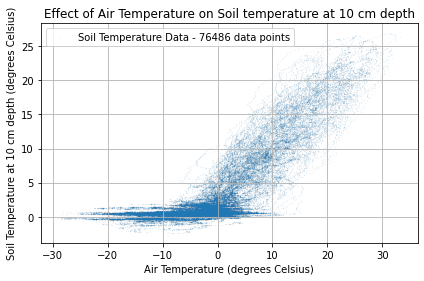

In [25]:
### linear model

### creating a plot
plt.figure()
plt.scatter(Tair, T10, s=0.001, marker='o', label='Soil Temperature Data - ' +str(winter.date.count())+ ' data points')
# s=0.001 is the size of the marker; label will add label if legend is added
plt.xlabel('Air Temperature (degrees Celsius)')
plt.ylabel('Soil Temperature at 10 cm depth (degrees Celsius)')
plt.title('Effect of Air Temperature on Soil temperature at 10 cm depth')
plt.legend()
plt.tight_layout()
plt.grid()

In [28]:
### Compute trendline
coeff=np.polyfit(Tair, T10, 1) ### 1 means linear fit y=mx+b or SOIL_TEMP = m*AIR_TEMP + b
print(coeff) #this will give m and b values

[0.49839616 4.04486497]


In [29]:
### getting x values to plot trendline

Tair=np.asarray(Tair) 
### converts x_vals into an array for easy calculation instead of the bracketed list
x_vals = np.linspace(Tair.min(), Tair.max(), 100) 
### This gives us 100 values equally spaced between min and max air temp

In [30]:
### computing y values from the given x values using polynomial evaluation function
y_vals = nm.polyval(coeff, x_vals)

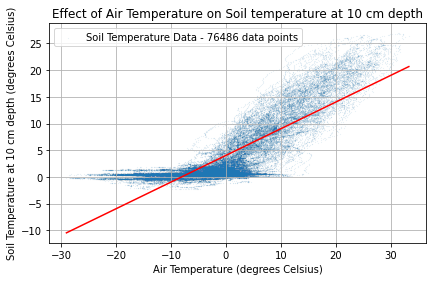

In [31]:
### plot on the same graph
plt.figure()
plt.scatter(Tair, T10, s=0.001, marker='o', label='Soil Temperature Data - ' +str(winter.date.count())+ ' data points')
# s=0.001 is the size of the marker; label will add label if legend is added
plt.xlabel('Air Temperature (degrees Celsius)')
plt.ylabel('Soil Temperature at 10 cm depth (degrees Celsius)')
plt.title('Effect of Air Temperature on Soil temperature at 10 cm depth')
plt.legend()
plt.tight_layout()
plt.grid()

plt.plot(x_vals, y_vals, 'r-') ## r- means red line

In [32]:
### compute residuals
y_pred = nm.polyval(coeff, Tair) ### calculating predicted y (soil temp) from actual x values (air temp)
# plt.plot(Tair, y_pred, 'g*') ### plot of predicted y values
residuals = y_pred-T10 ### predicted minus actual values

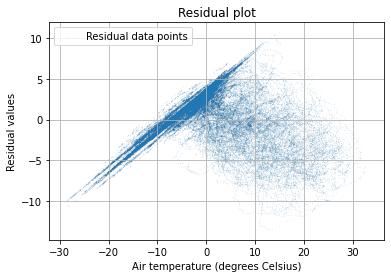

In [33]:
### new figure for residuals
plt.figure()
plt.scatter(Tair, residuals, s=0.001, marker='o', label='Residual data points')
plt.xlabel('Air temperature (degrees Celsius)')
plt.ylabel('Residual values')
plt.title('Residual plot')
plt.grid()
plt.legend()
plt.show()

In [34]:
### computing r^2
r2 = 1-np.sum(residuals**2)/np.sum((T10-np.mean(T10))**2)
print(r2)

0.6846186317087837


In [35]:
### it can be seen that data is clearly divided into two parts
### we are interested when the soil temperature is around 0
### we extract a dataset when soil temp is within 2.5 C of 0 from whole dataset
set1 = londesnew.loc[londesnew['T10'] < 2.5] 

# we do not need to set a lower limit as minimum T10 temp is -2.33
set1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51086 entries, 5851 to 158859
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      51086 non-null  datetime64[ns]
 1   T10       51086 non-null  float64       
 2   T30       51086 non-null  float64       
 3   T50       51086 non-null  float64       
 4   air_temp  51086 non-null  float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 2.3 MB


Text(0, 0.5, 'Frequency')

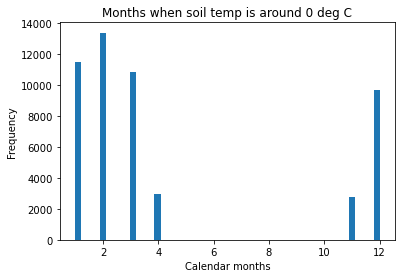

In [36]:
### let us see which months have soil temperature within 2.5 C of 0
plt.figure()
plt.hist(set1['date'].dt.month, bins=50)
plt.title('Months when soil temp is around 0 deg C')
plt.xlabel('Calendar months')
plt.ylabel('Frequency')

In [37]:
### new winter condition based on the previous result is winter = dec to mar
newwinter = pd.concat([dec, jan, feb, mar], ignore_index = True)

Text(0, 0.5, '50 cm temp')

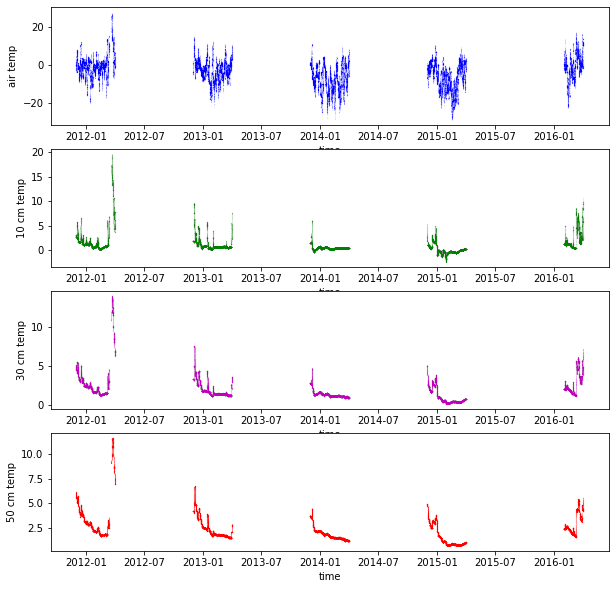

In [39]:
### plotting time series of whole new winter dataset in subplots (for all columns)
plt.figure(figsize=(10,10))
plt.subplot(4,1,1)
plt.scatter(newwinter.date, newwinter.air_temp, s=0.001, marker='o', c='b')
plt.xlabel('time')
plt.ylabel('air temp')
plt.subplot(4,1,2)
plt.scatter(newwinter.date, newwinter.T10, s=0.001, marker='o', c='g')
plt.xlabel('time')
plt.ylabel('10 cm temp')
plt.subplot(4,1,3)
plt.scatter(newwinter.date, newwinter.T30, s=0.001, marker='o', c='m')
plt.xlabel('time')
plt.ylabel('30 cm temp')
plt.subplot(4,1,4)
plt.scatter(newwinter.date, newwinter.T50, s=0.001, marker='o', c='r')
plt.xlabel('time')
plt.ylabel('50 cm temp')

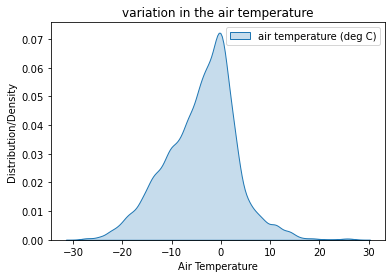

In [40]:
### plotting histogram for air temperature in new winter dataset using seaborn
plt.figure()
sns.kdeplot(newwinter.air_temp, shade=True, label='air temperature (deg C)')
plt.title('variation in the air temperature')
plt.xlabel('Air Temperature')
plt.ylabel('Distribution/Density')
plt.legend()

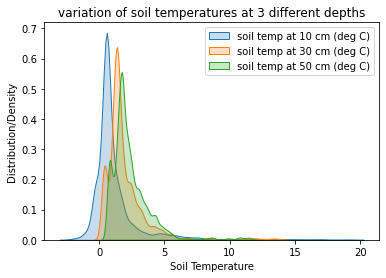

In [41]:
### plotting histogram for soil temperature in new winter dataset using seaborn
plt.figure()
sns.kdeplot(newwinter.T10, shade=True, label='soil temp at 10 cm (deg C)')
sns.kdeplot(newwinter.T30, shade=True, label='soil temp at 30 cm (deg C)')
sns.kdeplot(newwinter.T50, shade=True, label='soil temp at 50 cm (deg C)')
plt.title('variation of soil temperatures at 3 different depths')
plt.xlabel('Soil Temperature')
plt.ylabel('Distribution/Density')
plt.legend()

In [45]:
# defining newwinter variables
Tairnew = newwinter.air_temp
T10new = newwinter.T10
T30new = newwinter.T30
T50new = newwinter.T50

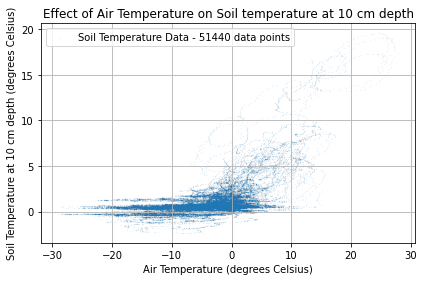

In [46]:
### creating scatterplot and fitting 2nd degree polynomial line
plt.figure()
plt.scatter(Tairnew, T10new, s=0.001, marker='o', label='Soil Temperature Data - ' +str(newwinter.date.count())+ ' data points')
# s=0.001 is the size of the marker; label will add label if legend is added
plt.xlabel('Air Temperature (degrees Celsius)')
plt.ylabel('Soil Temperature at 10 cm depth (degrees Celsius)')
plt.title('Effect of Air Temperature on Soil temperature at 10 cm depth')
plt.legend()
plt.tight_layout()
plt.grid()

In [47]:
### Compute trendline
coeff=np.polyfit(Tairnew, T10new, 2) 
### 1 means linear fit y=mx+b or SOIL_TEMP = m*AIR_TEMP + b
print(coeff)

[0.01217934 0.27502846 1.5009407 ]


In [48]:
### getting x values to plot trendline
Tairnew=np.asarray(Tairnew) 
### converts x_vals into an array for easy calculation instead of the bracketed list
x_vals = np.linspace(Tairnew.min(), Tairnew.max(), 100) 
### This gives us 100 values equally spaced between min and max air temp

In [49]:
### computing y values from the given x values using polynomial evaluation function
y_vals = nm.polyval(coeff, x_vals)

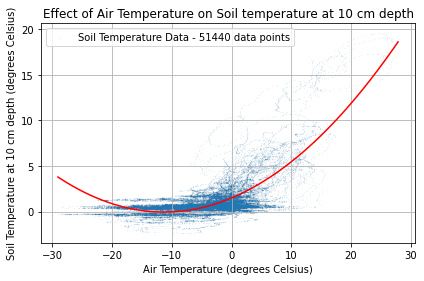

In [50]:
### plot on the same graph
plt.figure()
plt.scatter(Tairnew, T10new, s=0.001, marker='o', label='Soil Temperature Data - ' +str(newwinter.date.count())+ ' data points')
# s=0.001 is the size of the marker; label will add label if legend is added
plt.xlabel('Air Temperature (degrees Celsius)')
plt.ylabel('Soil Temperature at 10 cm depth (degrees Celsius)')
plt.title('Effect of Air Temperature on Soil temperature at 10 cm depth')
plt.legend()
plt.tight_layout()
plt.grid()

plt.plot(x_vals, y_vals, 'r-') ## r- means red line

In [51]:
### compute residuals
y_pred = nm.polyval(coeff, Tairnew) ### calculating predicted y (soil temp) from actual x values (air temp)
# plt.plot(Tair, y_pred, 'g*') ### plot of predicted y values
residuals = y_pred-T10new ### predicted minus actual values

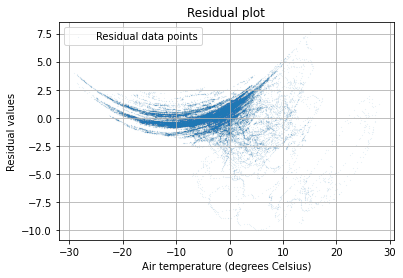

In [52]:
### new figure for residuals
plt.figure()
plt.scatter(Tairnew, residuals, s=0.001, marker='o', label='Residual data points')
plt.xlabel('Air temperature (degrees Celsius)')
plt.ylabel('Residual values')
plt.title('Residual plot')
plt.grid()
plt.legend()
plt.show()

In [53]:
### computing r^2
r2 = 1-nm.sum(residuals**2)/nm.sum((T10new-nm.mean(T10new))**2)
print(r2)

0.5534081932448474


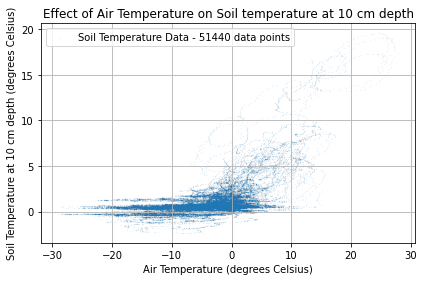

In [54]:
### creating scatterplot and fitting 3rd degree polynomial line
plt.figure()
plt.scatter(Tairnew, T10new, s=0.001, marker='o', label='Soil Temperature Data - ' +str(newwinter.date.count())+ ' data points')
# s=0.001 is the size of the marker; label will add label if legend is added
plt.xlabel('Air Temperature (degrees Celsius)')
plt.ylabel('Soil Temperature at 10 cm depth (degrees Celsius)')
plt.title('Effect of Air Temperature on Soil temperature at 10 cm depth')
plt.legend()
plt.tight_layout()
plt.grid()

In [58]:
### Compute trendline
coeff=np.polyfit(Tairnew, T10new, 3) ### 1 means linear fit y=mx+b or SOIL_TEMP = m*AIR_TEMP + b
print(coeff) #this will give m and b values

[2.99075827e-04 1.44899968e-02 2.23245634e-01 1.35552212e+00]


In [59]:
### getting x values to plot trendline
Tairnew=np.asarray(Tairnew) 
### converts x_vals into an array for easy calculation instead of the bracketed list
x_vals = np.linspace(Tairnew.min(), Tairnew.max(), 100) 
### This gives us 100 values equally spaced between min and max air temp

In [60]:
### computing y values from the given x values using polynomial evaluation function
y_vals = np.polyval(coeff, x_vals)

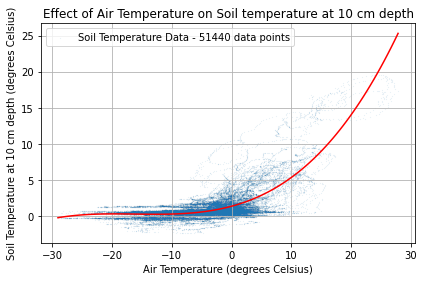

In [61]:
### plot on the same graph
plt.figure()
plt.scatter(Tairnew, T10new, s=0.001, marker='o', label='Soil Temperature Data - ' +str(newwinter.date.count())+ ' data points')
# s=0.001 is the size of the marker; label will add label if legend is added
plt.xlabel('Air Temperature (degrees Celsius)')
plt.ylabel('Soil Temperature at 10 cm depth (degrees Celsius)')
plt.title('Effect of Air Temperature on Soil temperature at 10 cm depth')
plt.legend()
plt.tight_layout()
plt.grid()

plt.plot(x_vals, y_vals, 'r-') ## r- means red line

In [62]:
### compute residuals
y_pred = np.polyval(coeff, Tairnew) 
### calculating predicted y (soil temp) from actual x values (air temp)
# plt.plot(Tair, y_pred, 'g*') ### plot of predicted y values
residuals = y_pred-T10new ### predicted minus actual values

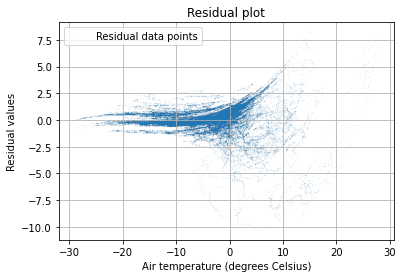

In [63]:
### new figure for residuals
plt.figure()
plt.scatter(Tairnew, residuals, s=0.001, marker='o', label='Residual data points')
plt.xlabel('Air temperature (degrees Celsius)')
plt.ylabel('Residual values')
plt.title('Residual plot')
plt.grid()
plt.legend()
plt.show()

In [64]:
### computing r^2
r2 = 1-np.sum(residuals**2)/np.sum((T10new-np.mean(T10new))**2)
print(r2)

0.5828255837298599


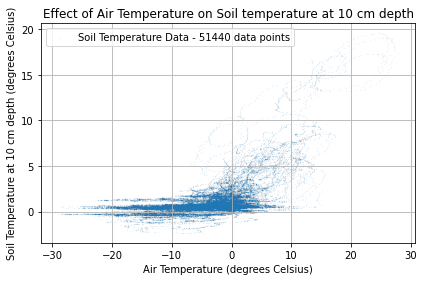

In [65]:
### creating scatterplot and fitting 4th degree polynomial line
plt.figure()
plt.scatter(Tairnew, T10new, s=0.001, marker='o', label='Soil Temperature Data - ' +str(newwinter.date.count())+ ' data points')
# s=0.001 is the size of the marker; label will add label if legend is added
plt.xlabel('Air Temperature (degrees Celsius)')
plt.ylabel('Soil Temperature at 10 cm depth (degrees Celsius)')
plt.title('Effect of Air Temperature on Soil temperature at 10 cm depth')
plt.legend()
plt.tight_layout()
plt.grid()

In [66]:
### Compute trendline
coeff=np.polyfit(Tairnew, T10new, 4) 
### 1 means linear fit y=mx+b or SOIL_TEMP = m*AIR_TEMP + b
print(coeff) #this will give m and b values

[-7.26972625e-06  2.52285719e-04  1.73730476e-02  2.38990654e-01
  1.30261945e+00]


In [67]:
### getting x values to plot trendline
Tairnew=np.asarray(Tairnew)
### converts x_vals into an array for easy calculation instead of the bracketed list
x_vals = np.linspace(Tairnew.min(), Tairnew.max(), 100) 
### This gives us 100 values equally spaced between min and max air temp

In [68]:
### computing y values from the given x values using polynomial evaluation function
y_vals = np.polyval(coeff, x_vals)

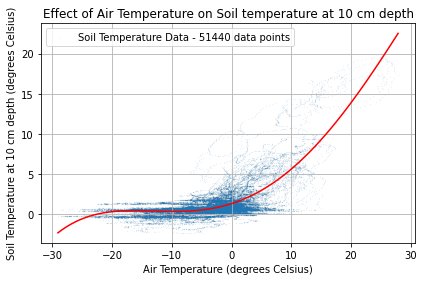

In [69]:
### plot on the same graph
plt.figure()
plt.scatter(Tairnew, T10new, s=0.001, marker='o', label='Soil Temperature Data - ' +str(newwinter.date.count())+ ' data points')
# s=0.001 is the size of the marker; label will add label if legend is added
plt.xlabel('Air Temperature (degrees Celsius)')
plt.ylabel('Soil Temperature at 10 cm depth (degrees Celsius)')
plt.title('Effect of Air Temperature on Soil temperature at 10 cm depth')
plt.legend()
plt.tight_layout()
plt.grid()

plt.plot(x_vals, y_vals, 'r-') ## r- means red line

In [70]:
### compute residuals
y_pred = np.polyval(coeff, Tairnew) 
### calculating predicted y (soil temp) from actual x values (air temp)
# plt.plot(Tair, y_pred, 'g*') ### plot of predicted y values
residuals = y_pred-T10new 
### predicted minus actual values

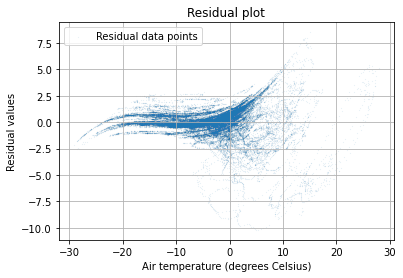

In [71]:
### new figure for residuals
plt.figure()
plt.scatter(Tairnew, residuals, s=0.001, marker='o', label='Residual data points')
plt.xlabel('Air temperature (degrees Celsius)')
plt.ylabel('Residual values')
plt.title('Residual plot')
plt.grid()
plt.legend()
plt.show()

In [73]:
### computing r^2
r2 = 1-np.sum(residuals**2)/np.sum((T10new-np.mean(T10new))**2)
print(r2)

0.5868192790406217


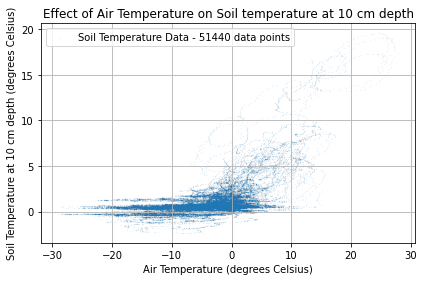

In [74]:
### creating scatterplot and fitting 5th degree polynomial line
plt.figure()
plt.scatter(Tairnew, T10new, s=0.001, marker='o', label='Soil Temperature Data - ' +str(newwinter.date.count())+ ' data points')
# s=0.001 is the size of the marker; label will add label if legend is added
plt.xlabel('Air Temperature (degrees Celsius)')
plt.ylabel('Soil Temperature at 10 cm depth (degrees Celsius)')
plt.title('Effect of Air Temperature on Soil temperature at 10 cm depth')
plt.legend()
plt.tight_layout()
plt.grid()

In [75]:
### Compute trendline
coeff=np.polyfit(Tairnew, T10new, 5) ### 1 means linear fit y=mx+b or SOIL_TEMP = m*AIR_TEMP + b
print(coeff) #this will give m and b values

[-8.74901868e-07 -1.26613816e-05  8.01826397e-04  2.07261092e-02
  1.97298678e-01  1.20661697e+00]


In [76]:
### getting x values to plot trendline
Tairnew=np.asarray(Tairnew) 
### converts x_vals into an array for easy calculation instead of the bracketed list
x_vals = np.linspace(Tairnew.min(), Tairnew.max(), 100) 
### This gives us 100 values equally spaced between min and max air temp


In [77]:
### computing y values from the given x values using polynomial evaluation function
y_vals = nm.polyval(coeff, x_vals)

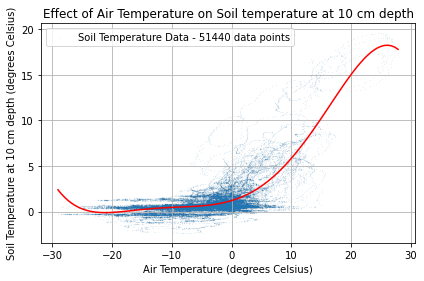

In [78]:
### plot on the same graph
plt.figure()
plt.scatter(Tairnew, T10new, s=0.001, marker='o', label='Soil Temperature Data - ' +str(newwinter.date.count())+ ' data points')
# s=0.001 is the size of the marker; label will add label if legend is added
plt.xlabel('Air Temperature (degrees Celsius)')
plt.ylabel('Soil Temperature at 10 cm depth (degrees Celsius)')
plt.title('Effect of Air Temperature on Soil temperature at 10 cm depth')
plt.legend()
plt.tight_layout()
plt.grid()

plt.plot(x_vals, y_vals, 'r-') ## r- means red line

In [79]:
### compute residuals
y_pred = np.polyval(coeff, Tairnew) 
### calculating predicted y (soil temp) from actual x values (air temp)
# plt.plot(Tair, y_pred, 'g*') ### plot of predicted y values
residuals = y_pred-T10new 
### predicted minus actual values

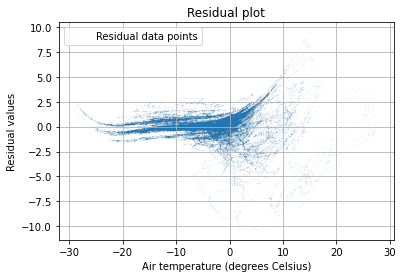

In [80]:
### new figure for residuals
plt.figure()
plt.scatter(Tairnew, residuals, s=0.001, marker='o', label='Residual data points')
plt.xlabel('Air temperature (degrees Celsius)')
plt.ylabel('Residual values')
plt.title('Residual plot')
plt.grid()
plt.legend()
plt.show()

In [81]:
### computing r^2
r2 = 1-np.sum(residuals**2)/np.sum((T10new-np.mean(T10new))**2)
print(r2)

0.5982797885955751


## DAILY AVERAGES

In [82]:
### finding daily averages

### setting date as index in the new winter data set
newwinter.set_index('date')

### resampling data so that we have daily averages of the temperatures
daily_nw = newwinter.resample('D', on='date').mean()

### dropping empty rows in newly created data set
daily_nw.dropna(axis = 0, how = 'any', inplace=True)

In [83]:
### potting the new daily average new winter dataset

### providing column values from dataframe to variables for easy code writing
T10d = daily_nw.T10
T30d = daily_nw.T30
T50d = daily_nw.T50
Taird = daily_nw.air_temp

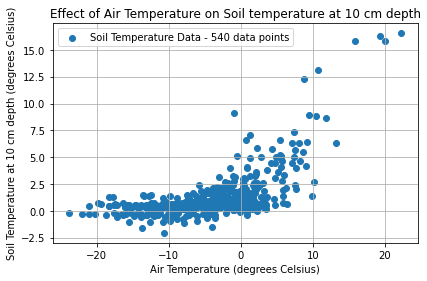

In [84]:
### creating scatterplot and fitting 4th degree polynomial line
plt.figure()
plt.scatter(Taird, T10d, marker='o', label='Soil Temperature Data - ' +str(daily_nw.air_temp.count())+ ' data points')
# s=0.001 is the size of the marker; label will add label if legend is added
plt.xlabel('Air Temperature (degrees Celsius)')
plt.ylabel('Soil Temperature at 10 cm depth (degrees Celsius)')
plt.title('Effect of Air Temperature on Soil temperature at 10 cm depth')
plt.legend()
plt.tight_layout()
plt.grid()

In [85]:
### Compute trendline
coeff=np.polyfit(Taird, T10d, 4) ### 1 means linear fit y=mx+b or SOIL_TEMP = m*AIR_TEMP + b
print(coeff) #this will give m and b values

[-9.69104693e-06  3.34735670e-04  2.06076692e-02  2.67741953e-01
  1.35812053e+00]


In [86]:
### getting x values to plot trendline
Taird=np.asarray(Taird) 
### converts x_vals into an array for easy calculation instead of the bracketed list
x_vals = np.linspace(Taird.min(), Taird.max(), 100) 
### This gives us 100 values equally spaced between min and max air temp


In [87]:
### computing y values from the given x values using polynomial evaluation function
y_vals = np.polyval(coeff, x_vals)

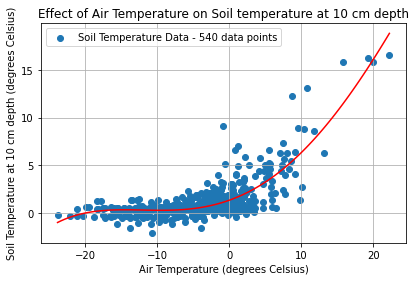

In [88]:
### plot on the same graph
plt.figure()
plt.scatter(Taird, T10d, marker='o', label='Soil Temperature Data - ' +str(daily_nw.air_temp.count())+ ' data points')
# s=0.001 is the size of the marker; label will add label if legend is added
plt.xlabel('Air Temperature (degrees Celsius)')
plt.ylabel('Soil Temperature at 10 cm depth (degrees Celsius)')
plt.title('Effect of Air Temperature on Soil temperature at 10 cm depth')
plt.legend()
plt.tight_layout()
plt.grid()

plt.plot(x_vals, y_vals, 'r-') ## r- means red line

In [89]:
### compute residuals
y_pred = np.polyval(coeff, Taird) 
### calculating predicted y (soil temp) from actual x values (air temp)
# plt.plot(Tair, y_pred, 'g*') ### plot of predicted y values
residuals = y_pred-T10d ### predicted minus actual values

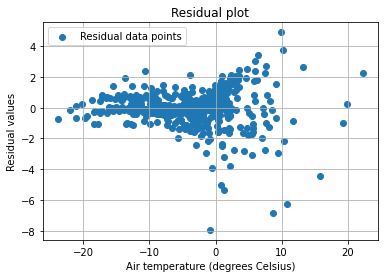

In [90]:
### new figure for residuals
plt.figure()
plt.scatter(Taird, residuals, marker='o', label='Residual data points')
plt.xlabel('Air temperature (degrees Celsius)')
plt.ylabel('Residual values')
plt.title('Residual plot')
plt.grid()
plt.legend()
plt.show()

In [91]:
### computing r^2
r2 = 1-np.sum(residuals**2)/np.sum((T10d-np.mean(T10d))**2)
print(r2)


0.6822234686157074


In [94]:
### creating a stacked dataset to have the depths at 10, 30 and 50 cm in one column (depth column), 
#and soil temperature in another column
wstacked = pd.melt(daily_nw.reset_index(), id_vars = ['date'], value_vars = ['T10', 'T30', 'T50'], 
                   var_name = 'depth', value_name = 'temp')

In [95]:
wstacked.head()

,date,depth,temp
0,2011-12-01,T10,3.011979
1,2011-12-02,T10,2.753750
2,2011-12-03,T10,2.539479
3,2011-12-04,T10,4.412708
4,2011-12-05,T10,4.996947


In [97]:
# changing the alphabetical data to numerical (e.g. changing T10 to 10) 
# and setting the values as float type
wstacked.depth[wstacked.depth == 'T10'] = 10
wstacked.depth[wstacked.depth == 'T30'] = 30
wstacked.depth[wstacked.depth == 'T50'] = 50
wstacked['depth']=wstacked['depth'].astype(float)

<ipython-input-97-4f2e790653cb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wstacked.depth[wstacked.depth == 'T10'] = 10
<ipython-input-97-4f2e790653cb>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wstacked.depth[wstacked.depth == 'T30'] = 30
<ipython-input-97-4f2e790653cb>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wstacked.depth[wstacked.depth == 'T50'] = 50


In [98]:
wstacked.head()

,date,depth,temp
0,2011-12-01,10.0,3.011979
1,2011-12-02,10.0,2.753750
2,2011-12-03,10.0,2.539479
3,2011-12-04,10.0,4.412708
4,2011-12-05,10.0,4.996947


In [99]:
### visualizing the stacked soil temperature data in new winter daily average data
# creating dataset with only T10, T30 and t50 and no air temperature
xyz = daily_nw.drop(['air_temp'], axis=1)

In [100]:
xyz.head()

,T10,T30,T50
date,,,
2011-12-01,3.011979,4.903854,5.947812
2011-12-02,2.753750,4.529479,5.577292
2011-12-03,2.539479,4.219583,5.267917
2011-12-04,4.412708,4.475208,5.101563
2011-12-05,4.996947,5.388737,5.539579


Text(0.5, 1.0, 'variation of temperature with depth')

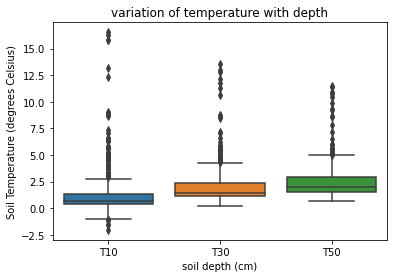

In [101]:
# plotting boxplot to see variation in soil temperature with depth
plt.figure()
sns.boxplot(data=xyz)
plt.xlabel('soil depth (cm)')
plt.ylabel('Soil Temperature (degrees Celsius)')
plt.title('variation of temperature with depth')

Text(0.5, 1.0, 'soil temperature variation with depth')

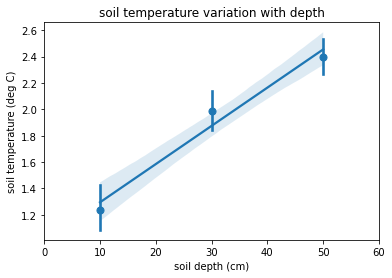

In [102]:
### modelling soil depth vs soil temp data
### fitting a linear polynomial
plt.figure()
ax = sns.regplot(x='depth', y='temp', data=wstacked, x_estimator=np.mean, order=1)
plt.xlim(0,60)
plt.xlabel('soil depth (cm)')
plt.ylabel('soil temperature (deg C)')
plt.title('soil temperature variation with depth')

In [103]:
# finding out the trendline and equation
coeff=np.polyfit(wstacked.depth, wstacked.temp, 1)
print('the equation is T = (' +str(round(coeff[0],2))+ '*D) + ' +str(round(coeff[1],2)))

the equation is T = (0.03*D) + 1.01


C:\Users\jaska\anaconda3\lib\site-packages\seaborn\regression.py:256: RankWarning: Polyfit may be poorly conditioned
  yhat = reg_func(x, y)
C:\Users\jaska\anaconda3\lib\site-packages\seaborn\algorithms.py:85: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\jaska\anaconda3\lib\site-packages\seaborn\algorithms.py:85: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\jaska\anaconda3\lib\site-packages\seaborn\algorithms.py:85: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\jaska\anaconda3\lib\site-packages\seaborn\algorithms.py:85: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\jaska\anaconda3\lib\site-packages\seaborn\algorithms.py:85: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\jaska\anaconda3\lib\site-packages\seabor

C:\Users\jaska\anaconda3\lib\site-packages\seaborn\algorithms.py:85: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\jaska\anaconda3\lib\site-packages\seaborn\algorithms.py:85: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\jaska\anaconda3\lib\site-packages\seaborn\algorithms.py:85: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\jaska\anaconda3\lib\site-packages\seaborn\algorithms.py:85: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\jaska\anaconda3\lib\site-packages\seaborn\algorithms.py:85: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\jaska\anaconda3\lib\site-packages\seaborn\algorithms.py:85: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\jaska\anaconda3\lib

C:\Users\jaska\anaconda3\lib\site-packages\seaborn\algorithms.py:85: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\jaska\anaconda3\lib\site-packages\seaborn\algorithms.py:85: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\jaska\anaconda3\lib\site-packages\seaborn\algorithms.py:85: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\jaska\anaconda3\lib\site-packages\seaborn\algorithms.py:85: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\jaska\anaconda3\lib\site-packages\seaborn\algorithms.py:85: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\jaska\anaconda3\lib\site-packages\seaborn\algorithms.py:85: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\jaska\anaconda3\lib

C:\Users\jaska\anaconda3\lib\site-packages\seaborn\algorithms.py:85: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\jaska\anaconda3\lib\site-packages\seaborn\algorithms.py:85: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\jaska\anaconda3\lib\site-packages\seaborn\algorithms.py:85: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\jaska\anaconda3\lib\site-packages\seaborn\algorithms.py:85: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\jaska\anaconda3\lib\site-packages\seaborn\algorithms.py:85: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\jaska\anaconda3\lib\site-packages\seaborn\algorithms.py:85: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\jaska\anaconda3\lib

C:\Users\jaska\anaconda3\lib\site-packages\seaborn\algorithms.py:85: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\jaska\anaconda3\lib\site-packages\seaborn\algorithms.py:85: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\jaska\anaconda3\lib\site-packages\seaborn\algorithms.py:85: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\jaska\anaconda3\lib\site-packages\seaborn\algorithms.py:85: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\jaska\anaconda3\lib\site-packages\seaborn\algorithms.py:85: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\jaska\anaconda3\lib\site-packages\seaborn\algorithms.py:85: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\jaska\anaconda3\lib

C:\Users\jaska\anaconda3\lib\site-packages\seaborn\algorithms.py:85: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\jaska\anaconda3\lib\site-packages\seaborn\algorithms.py:85: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\jaska\anaconda3\lib\site-packages\seaborn\algorithms.py:85: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\jaska\anaconda3\lib\site-packages\seaborn\algorithms.py:85: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\jaska\anaconda3\lib\site-packages\seaborn\algorithms.py:85: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\jaska\anaconda3\lib\site-packages\seaborn\algorithms.py:85: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\jaska\anaconda3\lib

C:\Users\jaska\anaconda3\lib\site-packages\seaborn\algorithms.py:85: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\jaska\anaconda3\lib\site-packages\seaborn\algorithms.py:85: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\jaska\anaconda3\lib\site-packages\seaborn\algorithms.py:85: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\jaska\anaconda3\lib\site-packages\seaborn\algorithms.py:85: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\jaska\anaconda3\lib\site-packages\seaborn\algorithms.py:85: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\jaska\anaconda3\lib\site-packages\seaborn\algorithms.py:85: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\jaska\anaconda3\lib

C:\Users\jaska\anaconda3\lib\site-packages\seaborn\algorithms.py:85: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\jaska\anaconda3\lib\site-packages\seaborn\algorithms.py:85: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\jaska\anaconda3\lib\site-packages\seaborn\algorithms.py:85: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\jaska\anaconda3\lib\site-packages\seaborn\algorithms.py:85: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\jaska\anaconda3\lib\site-packages\seaborn\algorithms.py:85: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\jaska\anaconda3\lib\site-packages\seaborn\algorithms.py:85: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\jaska\anaconda3\lib

Text(0.5, 1.0, 'soil temperature variation with depth')

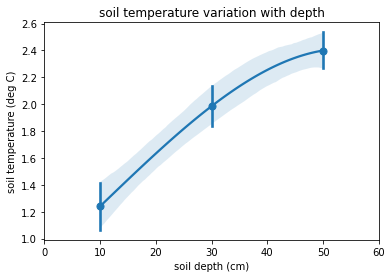

In [104]:
### fitting a second degree polynomial
plt.figure()
ax = sns.regplot(x='depth', y='temp', data=wstacked, x_estimator=np.mean, order=3)
plt.xlim(0,60)
plt.xlabel('soil depth (cm)')
plt.ylabel('soil temperature (deg C)')
plt.title('soil temperature variation with depth')

In [105]:
# finding out the trendline and equation
coeff=np.polyfit(wstacked.depth, wstacked.temp, 2)
print(coeff)

[-4.14635775e-04  5.38585654e-02  7.42875417e-01]
